In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
print pd.__version__

0.18.1


In [8]:
#os.chdir("C:\\Users\\Biswanath\\CodeForPrinceton\\AirQuality\\Data\\2016")
os.chdir("E:\\Air-Quality\\Data\\2016")
o3 = pd.read_csv('hourly_44201_2016.zip', compression='zip', sep=',', quotechar='"')
#o3 = pd.read_csv('hourly_44201_2016.csv', sep=',', quotechar='"')
print o3.head()

   State Code  County Code  Site Num  Parameter Code  POC  Latitude  \
0           1           49      9991           44201    1    34.289   
1           1           49      9991           44201    1    34.289   
2           1           49      9991           44201    1    34.289   
3           1           49      9991           44201    1    34.289   
4           1           49      9991           44201    1    34.289   

   Longitude  Datum Parameter Name  Date Local         ...           \
0  -85.97007  NAD83          Ozone  2016-01-01         ...            
1  -85.97007  NAD83          Ozone  2016-01-01         ...            
2  -85.97007  NAD83          Ozone  2016-01-01         ...            
3  -85.97007  NAD83          Ozone  2016-01-01         ...            
4  -85.97007  NAD83          Ozone  2016-01-01         ...            

    Units of Measure    MDL Uncertainty  Qualifier Method Type  Method Code  \
0  Parts per million  0.005         NaN        NaN         FEM     

In [9]:
print o3.iloc[0]


State Code                                       1
County Code                                     49
Site Num                                      9991
Parameter Code                               44201
POC                                              1
Latitude                                    34.289
Longitude                                 -85.9701
Datum                                        NAD83
Parameter Name                               Ozone
Date Local                              2016-01-01
Time Local                                   00:00
Date GMT                                2016-01-01
Time GMT                                     06:00
Sample Measurement                           0.019
Units of Measure                 Parts per million
MDL                                          0.005
Uncertainty                                    NaN
Qualifier                                      NaN
Method Type                                    FEM
Method Code                    

In [10]:
nj = o3[o3['State Name']=='New Jersey']


In [11]:
print nj.iloc[:25][['Latitude','Longitude','Date Local','Time Local','Sample Measurement']]
#print nj['Latitude','Longitude','Date Local','Time Local','Sample Measurement'][0]

        Latitude  Longitude  Date Local Time Local  Sample Measurement
970585   40.3125   -74.8729  2016-01-01      00:00               0.029
970586   40.3125   -74.8729  2016-01-01      01:00               0.028
970587   40.3125   -74.8729  2016-01-01      03:00               0.025
970588   40.3125   -74.8729  2016-01-01      04:00               0.023
970589   40.3125   -74.8729  2016-01-01      05:00               0.022
970590   40.3125   -74.8729  2016-01-01      06:00               0.023
970591   40.3125   -74.8729  2016-01-01      07:00               0.023
970592   40.3125   -74.8729  2016-01-01      08:00               0.025
970593   40.3125   -74.8729  2016-01-01      09:00               0.028
970594   40.3125   -74.8729  2016-01-01      10:00               0.029
970595   40.3125   -74.8729  2016-01-01      11:00               0.029
970596   40.3125   -74.8729  2016-01-01      12:00               0.031
970597   40.3125   -74.8729  2016-01-01      13:00               0.031
970598

In [12]:
nj.iloc[0]['Date Local'],nj.iloc[0]['Time Local']

('2016-01-01', '00:00')

In [19]:
nj['DateStr'] = nj['Date Local'] + ' ' + nj['Time Local']
nj['DateStr'].head() 

C:\Users\sid\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


970585    2016-01-01 00:00
970586    2016-01-01 01:00
970587    2016-01-01 03:00
970588    2016-01-01 04:00
970589    2016-01-01 05:00
Name: DateStr, dtype: object

In [32]:
nj['Days'] = pd.to_datetime(nj['DateStr'])
nj['Days'].head()

C:\Users\sid\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


970585   2016-01-01 00:00:00
970586   2016-01-01 01:00:00
970587   2016-01-01 03:00:00
970588   2016-01-01 04:00:00
970589   2016-01-01 05:00:00
Name: Days, dtype: datetime64[ns]

In [33]:
nj['Days'].dt.dayofyear.head()

970585    1
970586    1
970587    1
970588    1
970589    1
Name: Days, dtype: int64

In [34]:
#nj['Days'] = nj['Days'] - nj.iloc[0]['Days']

In [35]:
nj['Days_frac'] = nj['Days'].dt.dayofyear +  nj['Days'].dt.hour/24.
nj['Days_frac'].head(25)

C:\Users\sid\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


970585    1.000000
970586    1.041667
970587    1.125000
970588    1.166667
970589    1.208333
970590    1.250000
970591    1.291667
970592    1.333333
970593    1.375000
970594    1.416667
970595    1.458333
970596    1.500000
970597    1.541667
970598    1.583333
970599    1.625000
970600    1.666667
970601    1.708333
970602    1.750000
970603    1.791667
970604    1.833333
970605    1.875000
970606    1.916667
970607    1.958333
970608    2.000000
970609    2.041667
Name: Days_frac, dtype: float64

In [42]:
plt.plot(nj['Days_frac'],nj['Sample Measurement'])

In [43]:
plt.xlabel('Days')
plt.ylabel('Ozone(ppm)')
plt.title('Concentration for Year 2016')

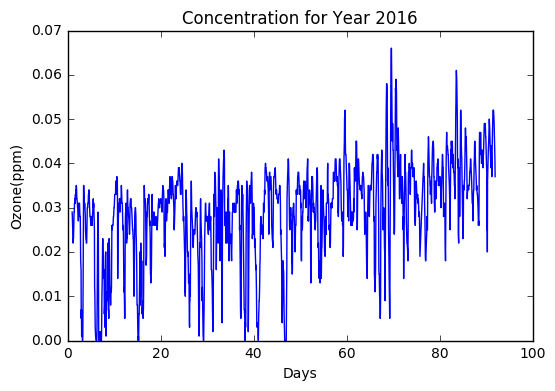

In [44]:
plt.show()

In [39]:
print nj.iloc[-1]

State Code                                      34
County Code                                     21
Site Num                                      9991
Parameter Code                               44201
POC                                              1
Latitude                                   40.3125
Longitude                                 -74.8729
Datum                                        NAD83
Parameter Name                               Ozone
Date Local                              2016-03-31
Time Local                                   23:00
Date GMT                                2016-04-01
Time GMT                                     04:00
Sample Measurement                           0.037
Units of Measure                 Parts per million
MDL                                          0.005
Uncertainty                                    NaN
Qualifier                                      NaN
Method Type                                    FEM
Method Code                    